In [6]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import shoji
import scanpy as sc
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(name)s: %(message)s",
    handlers=[logging.StreamHandler()]  # ensures output appears in notebook
)

logger = logging.getLogger(__name__)
logger.info("Logging initialized successfully.")

2025-10-18 12:23:25,266 [INFO] __main__: Logging initialized successfully.


## Connect to Shoji

In [2]:
db = shoji.connect()
db

Workspace with 0 workspaces, 0 dimensions and 0 tensors:

## Download example dataset 

In [18]:
import tempfile
import requests
import os

# Example URL
url = "https://storage.googleapis.com/linnarsson-lab-glioblastoma/EEL/DataSubmission/SL_OrganoidExperiment.h5ad"

# Create a temporary directory
temp_dir = tempfile.mkdtemp()

# Define destination path (preserve original filename)
filename = os.path.basename(url)
data_path = os.path.join(temp_dir, filename)

# Download file
logger.info(f"Downloading...")
response = requests.get(url, stream=True)
response.raise_for_status()  # Raise error for bad status codes

with open(data_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

logger.info(f"File saved to: {data_path}")

2025-10-18 12:32:20,393 [INFO] __main__: Downloading...
2025-10-18 12:32:26,777 [INFO] __main__: File saved to: /var/folders/_s/mt_njbv926z59crly_93hm0r0000gn/T/tmpufv7906a/SL_OrganoidExperiment.h5ad


## Import the example dataset into Shoji

In [3]:
# Create a test workspace, and a subworkspace for holding an example dataset
db.test = shoji.Workspace()
db.test.organoids = shoji.Workspace()
ws = db.test.organoids

In [4]:
# Load the sample data into your local Shoji database
ad = sc.read_h5ad(data_path)
ws.import_adata(ad, verbose=True)

2025-10-18 12:21:53,751 [INFO] root: Loading gene attributes
2025-10-18 12:21:53,897 [INFO] root: Loading cells attributes


In [5]:
ws  # View the imported dataset

Workspace with 0 workspaces, 2 dimensions and 23 tensors:
  cells <Dimension of shape 191698>
  genes <Dimension of shape 366>
  Batch <Tensor Batch dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  CellID <Tensor CellID dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Cell_area <Tensor Cell_area dtype='float64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Cell_id <Tensor Cell_id dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Condition <Tensor Condition dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Control_codeword_counts <Tensor Control_codeword_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Control_probe_counts <Tensor Control_probe_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Deprecated_codeword_counts <Tensor Deprecated_codeword_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Expression <Tensor Expression dtype='float32' dims=('cells', 'genes'), shape=(191698, 366), chunks=(75, 100)>
  Feature_types <Tensor Feature_types dtype='string' dims=('genes',), shape=(366,), chunks=(15,)>
  Gene <Tensor Gene dtype='string' dims=('genes',), shape=(366,), chunks=(15,)>
  Gene_ids <Tensor Gene_ids dtype='string' dims=('genes',), shape=(366,), chunks=(15,)>
  Genome <Tensor Genome dtype='string' dims=('genes',), shape=(366,), chunks=(15,)>
  Line <Tensor Line dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  NucleiPolygons <Tensor NucleiPolygons dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Nucleus_area <Tensor Nucleus_area dtype='float64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Polygons <Tensor Polygons dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Time <Tensor Time dtype='string' dims=('cells',), shape=(191698,), chunks=(15,)>
  Total_counts <Tensor Total_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Transcript_counts <Tensor Transcript_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Unassigned_codeword_counts <Tensor Unassigned_codeword_counts dtype='int64' dims=('cells',), shape=(191698,), chunks=(62,)>
  X_centroid <Tensor X_centroid dtype='float64' dims=('cells',), shape=(191698,), chunks=(62,)>
  Y_centroid <Tensor Y_centroid dtype='float64' dims=('cells',), shape=(191698,), chunks=(62,)>

## Plot VEGFA expression

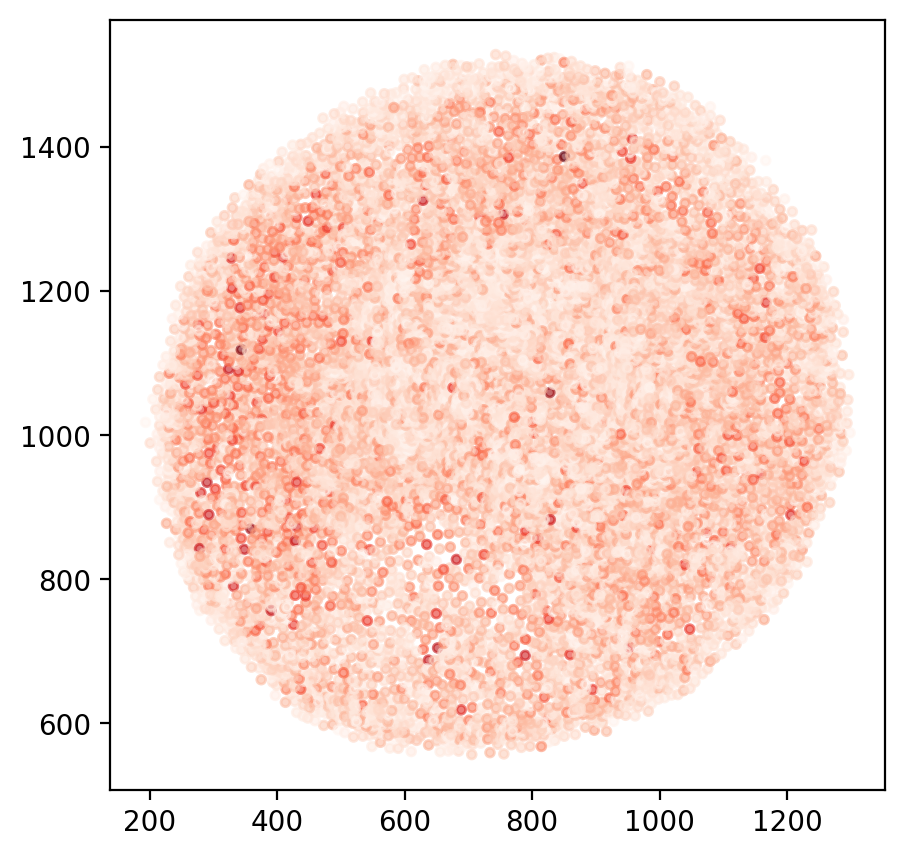

In [17]:
# Plot a single organoid (batch "0")
# Plot the expression of VEGFA
# Note this is a spatial dataset, a Xenium assay applied to a glioblastoma organoid; hence the round shape
plt.figure(figsize=(5,5))
plt.scatter(ws.X_centroid[ws.Batch == "0"], ws.Y_centroid[ws.Batch == "0"], c=ws.Expression[ws.Batch == "0", ws.Gene == "VEGFA"], s=10, alpha=0.6, cmap=plt.cm.Reds)

In [6]:
# Cleanup
# WARNING: this immediately deletes all the data in test and its sub-workspaces
# Uncomment the line below to delete the test workspace, including the organoids example dataset
# del db.test  